# Investigating Web Server Logs into Identifying Malicious Attacks Using Python 

The aim of this exercise is to examine web server logs to uncover potential malicious attacks and tabulate them properly for effective response and mitigation.

## Installing Relevant Libraries

Networkx doesn't come pre-installed.

In [3]:
!pip install networkx

     |████████████████████████████████| 2.1 MB 11.2 MB/s eta 0:00:01


## Importing The Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10)

## Loading The Dataset for Analysis

In [3]:
 data_file = '/home/uwe/Desktop/co2-asoluka_24jan_dataset.txt'

In [6]:
data = pd.read_csv(data_file, delim_whitespace=True)
temp_df = data[data.columns[:-1]]
temp_df.columns = data.columns[1:]
data = temp_df
data['datetime'] = pd.to_datetime(data['date'] + " " + data['time'])
data

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken,datetime
0,2024-01-01,00:11:00,16.198.56.165,GET,ubifvmby.css,-,443,-,193.7.194.143,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_6+like+M...,-,404,0,0,21,2024-01-01 00:11:00
1,2024-01-01,00:11:00,16.198.56.165,GET,main.css,-,443,-,193.7.194.143,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_6+like+M...,-,200,0,0,20,2024-01-01 00:11:00
2,2024-01-01,00:11:00,16.198.56.165,GET,index.aspx,-,443,-,193.7.194.143,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_6+like+M...,-,200,0,0,27,2024-01-01 00:11:00
3,2024-01-01,00:11:22,16.198.56.165,GET,main.css,-,443,-,193.7.194.143,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_6+like+M...,https://uwetech.co.uk/index.aspx,200,0,0,21,2024-01-01 00:11:22
4,2024-01-01,00:11:22,16.198.56.165,GET,hlzufkoa.css,-,443,-,193.7.194.143,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_6+like+M...,https://uwetech.co.uk/index.aspx,200,0,0,26,2024-01-01 00:11:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348763,2024-01-30,23:07:30,16.198.56.165,GET,transactions.aspx,page=4,443,yp889753,176.123.62.148,Mozilla/5.0+(Windows+NT+5.1)+AppleWebKit/537.3...,https://uwetech.co.uk/transactions.aspx,200,0,0,27,2024-01-30 23:07:30
348764,2024-01-30,23:08:00,16.198.56.165,GET,pglypvel.css,-,443,yp889753,176.123.62.148,Mozilla/5.0+(Windows+NT+5.1)+AppleWebKit/537.3...,https://uwetech.co.uk/transactions.aspx,200,0,0,27,2024-01-30 23:08:00
348765,2024-01-30,23:08:00,16.198.56.165,GET,template.css,v=atrtqiux,443,yp889753,176.123.62.148,Mozilla/5.0+(Windows+NT+5.1)+AppleWebKit/537.3...,https://uwetech.co.uk/transactions.aspx,200,0,0,30,2024-01-30 23:08:00
348766,2024-01-30,23:08:00,16.198.56.165,GET,cnmyhrvd.css,-,443,yp889753,176.123.62.148,Mozilla/5.0+(Windows+NT+5.1)+AppleWebKit/537.3...,https://uwetech.co.uk/transactions.aspx,200,0,0,24,2024-01-30 23:08:00


### Q1:  Show how often each of the unique machines (defined by client IP address 'c-ip') have accessed this web server application?

In [7]:
access_counts = data['c-ip'].value_counts().reset_index()
access_counts.columns = ['Client IP', 'Access Count']
access_counts

,Client IP,Access Count
0,185.23.179.156,145
1,143.222.9.15,145
2,216.241.253.148,145
3,161.30.211.185,143
4,213.32.231.2,142
...,...,...
4918,80.87.131.29,20
4919,194.116.255.208,20
4920,193.34.170.34,20
4921,185.58.24.226,19


### Q2: Show how often each of the possible unique URLs (defined by 'cs(Referer)') have been accessed within the dataset?

In [8]:
# Group by 'cs(Referer)' and count the occurrences
referer_counts = data['cs(Referer)'].value_counts().reset_index()

# Rename the columns for clarity
referer_counts.columns = ['Referer URL', 'Access Count']

# Display the result
referer_counts

,Referer URL,Access Count
0,https://uwetech.co.uk/transactions.aspx,117186
1,https://uwetech.co.uk/index.aspx,89961
2,https://uwetech.co.uk/login.aspx,65650
3,https://uwetech.co.uk/account_status.aspx,31114
4,-,29954
...,...,...
8,https://uwetech.co.uk/transfer_complete.aspx,1254
9,https://uwetech.co.uk/change_avatar.aspx,585
10,https://uwetech.co.uk/khvylbcj.aspx,9
11,https://uwetech.co.uk/brfftzpo.aspx,7


### Q3: Show how often each client IP has accessed each URL?

In [9]:
# Group by 'c-ip' and 'cs-uri-stem', and count occurrences
access_counts = data.groupby(['c-ip', 'cs-uri-stem']).size().reset_index(name='Access Count')

# Display the result
access_counts

,c-ip,cs-uri-stem,Access Count
0,101.0.10.12,account_status.aspx,3
1,101.0.10.12,aoetddgf.css,1
2,101.0.10.12,artpguct.js,1
3,101.0.10.12,crywoozk.css,1
4,101.0.10.12,dtmmasza.css,1
...,...,...,...
161078,99.84.9.31,transactions.aspx,7
161079,99.84.9.31,vhewteup.css,1
161080,99.84.9.31,vlkgzlcq.css,1
161081,99.84.9.31,wqzvdjnd.css,1


### Q4:  Filter the data to show all rows where 'cs-uri-query' starts with the string 'v='.

In [10]:
filtered_df = data[data['cs-uri-query'].str.startswith('v=', na=False)]

# Display the filtered rows
filtered_df

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken,datetime
7,2024-01-01,00:11:39,16.198.56.165,GET,template.css,v=ihdqmvpz,443,-,193.7.194.143,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_6+like+M...,https://uwetech.co.uk/index.aspx,200,0,0,21,2024-01-01 00:11:39
16,2024-01-01,00:12:10,16.198.56.165,GET,jmfdqjhm.js,v=930374,443,oz521138,193.7.194.143,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_6+like+M...,https://uwetech.co.uk/login.aspx,200,0,0,29,2024-01-01 00:12:10
25,2024-01-01,00:12:49,16.198.56.165,GET,template.css,v=tseclsye,443,oz521138,193.7.194.143,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_6+like+M...,https://uwetech.co.uk/transactions.aspx,200,0,0,27,2024-01-01 00:12:49
27,2024-01-01,00:12:53,16.198.56.165,GET,template.css,v=aewdnxhn,443,oz521138,193.7.194.143,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_6+like+M...,https://uwetech.co.uk/transactions.aspx,200,0,0,24,2024-01-01 00:12:53
31,2024-01-01,00:13:01,16.198.56.165,GET,oxcvshzj.js,v=648516,443,oz521138,193.7.194.143,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_6+like+M...,https://uwetech.co.uk/transactions.aspx,200,0,0,27,2024-01-01 00:13:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348744,2024-01-30,23:05:40,16.198.56.165,GET,bnsaingz.js,v=835722,443,yp889753,176.123.62.148,Mozilla/5.0+(Windows+NT+5.1)+AppleWebKit/537.3...,https://uwetech.co.uk/login.aspx,200,0,0,29,2024-01-30 23:05:40
348745,2024-01-30,23:05:40,16.198.56.165,GET,ojdxhwoq.js,v=382903,443,yp889753,176.123.62.148,Mozilla/5.0+(Windows+NT+5.1)+AppleWebKit/537.3...,https://uwetech.co.uk/login.aspx,200,0,0,28,2024-01-30 23:05:40
348749,2024-01-30,23:06:07,16.198.56.165,GET,jyoyencz.js,v=133767,443,yp889753,176.123.62.148,Mozilla/5.0+(Windows+NT+5.1)+AppleWebKit/537.3...,https://uwetech.co.uk/account_status.aspx,200,0,0,24,2024-01-30 23:06:07
348758,2024-01-30,23:07:04,16.198.56.165,GET,template.css,v=xuxbrcij,443,yp889753,176.123.62.148,Mozilla/5.0+(Windows+NT+5.1)+AppleWebKit/537.3...,https://uwetech.co.uk/transactions.aspx,200,0,0,26,2024-01-30 23:07:04


### Q5: Filter the data to show all rows where 'cs(User-Agent)' contain the string 'Win64?

In [11]:
# Filter rows where 'cs(User-Agent)' contains 'Win64'
filtered_df = data[data['cs(User-Agent)'].str.contains('Win64', na=False)]

# Display the filtered rows
filtered_df

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken,datetime
86,2024-01-01,01:47:00,16.198.56.165,GET,favico.ico,-,443,-,192.88.128.249,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,22,2024-01-01 01:47:00
87,2024-01-01,01:47:00,16.198.56.165,GET,index.aspx,-,443,-,192.88.128.249,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,21,2024-01-01 01:47:00
88,2024-01-01,01:47:05,16.198.56.165,GET,template.css,v=ovzozaox,443,-,192.88.128.249,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://uwetech.co.uk/index.aspx,200,0,0,29,2024-01-01 01:47:05
89,2024-01-01,01:47:05,16.198.56.165,GET,template.css,v=ybwvhfuk,443,-,192.88.128.249,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://uwetech.co.uk/index.aspx,200,0,0,21,2024-01-01 01:47:05
90,2024-01-01,01:47:05,16.198.56.165,GET,oisbjkml.css,-,443,-,192.88.128.249,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://uwetech.co.uk/index.aspx,404,0,0,25,2024-01-01 01:47:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348560,2024-01-30,22:15:46,16.198.56.165,GET,bzgukevt.css,-,443,nw696687,195.182.188.34,Mozilla/5.0+(Windows+NT+5.1;+Win64;+x64)+Apple...,https://uwetech.co.uk/transactions.aspx,200,0,0,20,2024-01-30 22:15:46
348561,2024-01-30,22:15:46,16.198.56.165,GET,sycvfjye.css,-,443,nw696687,195.182.188.34,Mozilla/5.0+(Windows+NT+5.1;+Win64;+x64)+Apple...,https://uwetech.co.uk/transactions.aspx,200,0,0,28,2024-01-30 22:15:46
348562,2024-01-30,22:15:46,16.198.56.165,GET,transactions.aspx,page=4,443,nw696687,195.182.188.34,Mozilla/5.0+(Windows+NT+5.1;+Win64;+x64)+Apple...,https://uwetech.co.uk/transactions.aspx,200,0,0,22,2024-01-30 22:15:46
348563,2024-01-30,22:15:54,16.198.56.165,GET,qdcfhydf.js,v=876642,443,nw696687,195.182.188.34,Mozilla/5.0+(Windows+NT+5.1;+Win64;+x64)+Apple...,https://uwetech.co.uk/transactions.aspx,200,0,0,28,2024-01-30 22:15:54


### Q6:  Filter the data to show all rows where 'sc-status' is equal to 404, before 07:00AM?

In [12]:
# Convert the 'time' column to datetime.time for comparison
data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S').dt.time

# Define the cutoff time (07:00 AM)
cutoff_time = pd.to_datetime('07:00:00', format='%H:%M:%S').time()

# Filter rows where 'sc-status' is 404 and time is before 07:00 AM
filtered_df = data[(data['sc-status'] == 404) & (data['time'] < cutoff_time)]

# Display the filtered rows
filtered_df

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken,datetime
0,2024-01-01,00:11:00,16.198.56.165,GET,ubifvmby.css,-,443,-,193.7.194.143,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_6+like+M...,-,404,0,0,21,2024-01-01 00:11:00
5,2024-01-01,00:11:22,16.198.56.165,GET,ecwzczic.css,-,443,-,193.7.194.143,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_6+like+M...,https://uwetech.co.uk/index.aspx,404,0,0,27,2024-01-01 00:11:22
12,2024-01-01,00:12:00,16.198.56.165,GET,upunroko.css,-,443,-,193.7.194.143,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_6+like+M...,https://uwetech.co.uk/index.aspx,404,0,0,29,2024-01-01 00:12:00
13,2024-01-01,00:12:00,16.198.56.165,GET,spslpyam.css,-,443,-,193.7.194.143,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_6+like+M...,https://uwetech.co.uk/index.aspx,404,0,0,28,2024-01-01 00:12:00
55,2024-01-01,00:44:38,16.198.56.165,GET,ozgybcge.css,-,443,pt449002,195.59.188.223,Mozilla/5.0+(compatible;+MSIE+9.0;+Windows+NT+...,https://uwetech.co.uk/login.aspx,404,0,0,25,2024-01-01 00:44:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337334,2024-01-30,06:50:47,16.198.56.165,GET,asehekew.css,-,443,-,83.118.249.198,Mozilla/5.0+(Windows+NT+6.1;+Win64;+x64)+Apple...,https://uwetech.co.uk/index.aspx,404,0,0,27,2024-01-30 06:50:47
337354,2024-01-30,06:51:29,16.198.56.165,GET,bvhcqgdp.css,-,443,-,194.10.164.92,Outlook-iOS/709.2189947.prod.iphone+(3.24.0)+O...,https://uwetech.co.uk/index.aspx,404,0,0,23,2024-01-30 06:51:29
337366,2024-01-30,06:52:01,16.198.56.165,GET,wurnurff.css,-,443,dq687857,83.118.249.198,Mozilla/5.0+(Windows+NT+6.1;+Win64;+x64)+Apple...,https://uwetech.co.uk/account_status.aspx,404,0,0,24,2024-01-30 06:52:01
337412,2024-01-30,06:53:31,16.198.56.165,GET,ldbgewfc.css,-,443,si121197,193.30.41.141,Mozilla/5.0+(Windows+NT+10.0;+WOW64)+AppleWebK...,https://uwetech.co.uk/account_status.aspx,404,0,0,24,2024-01-30 06:53:31


### Q7:  Plot a Bar Chart showing the number of entries for each value in 'sc-status'.

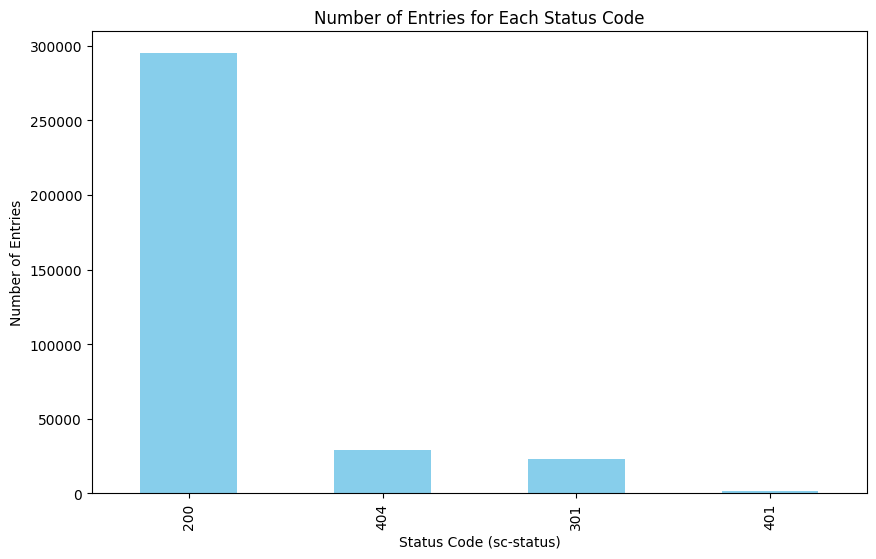

In [13]:
# Count the occurrences of each unique value in 'sc-status'
status_counts = data['sc-status'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Status Code (sc-status)')
plt.ylabel('Number of Entries')
plt.title('Number of Entries for Each Status Code')

# Display the plot
plt.show()

### Q8: Plot a line chart that shows the number of records (Y-axis) vs each day within the dataset (X-axis). 

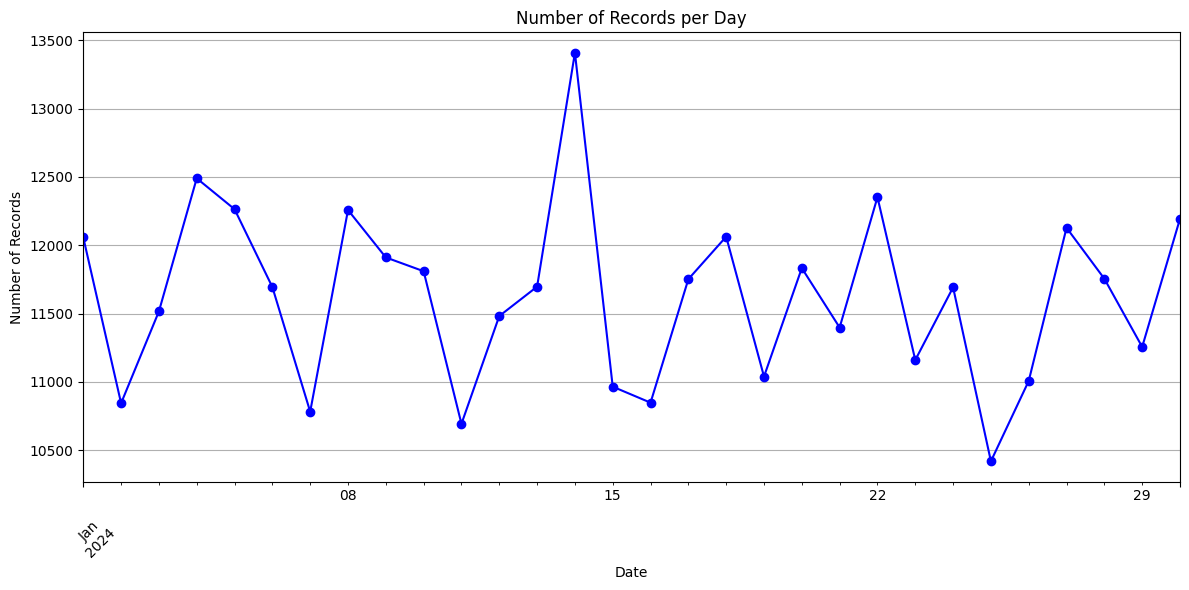

In [14]:
# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Group by 'date' and count the number of records for each day
daily_counts = data.groupby('date').size()

# Plot the line chart
plt.figure(figsize=(12, 6))
daily_counts.plot(kind='line', marker='o', color='blue', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.title('Number of Records per Day')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

### Q9: Filter and Plot a Network graph using the NetworkX library based on the criteria below

* Filter the data to only the 20 most active IP addresses and plot this using a Network chart.
* Scale each client node within the chart based on the amount of activity.

Network graph saved as 'network_graph.png'
Graph contains 20 client nodes and 15 resource nodes
Graph shows 160 significant connections
Top 5 most active IPs:
  185.23.179.156: 145 requests
  143.222.9.15: 145 requests
  216.241.253.148: 145 requests
  161.30.211.185: 143 requests
  213.32.231.2: 142 requests


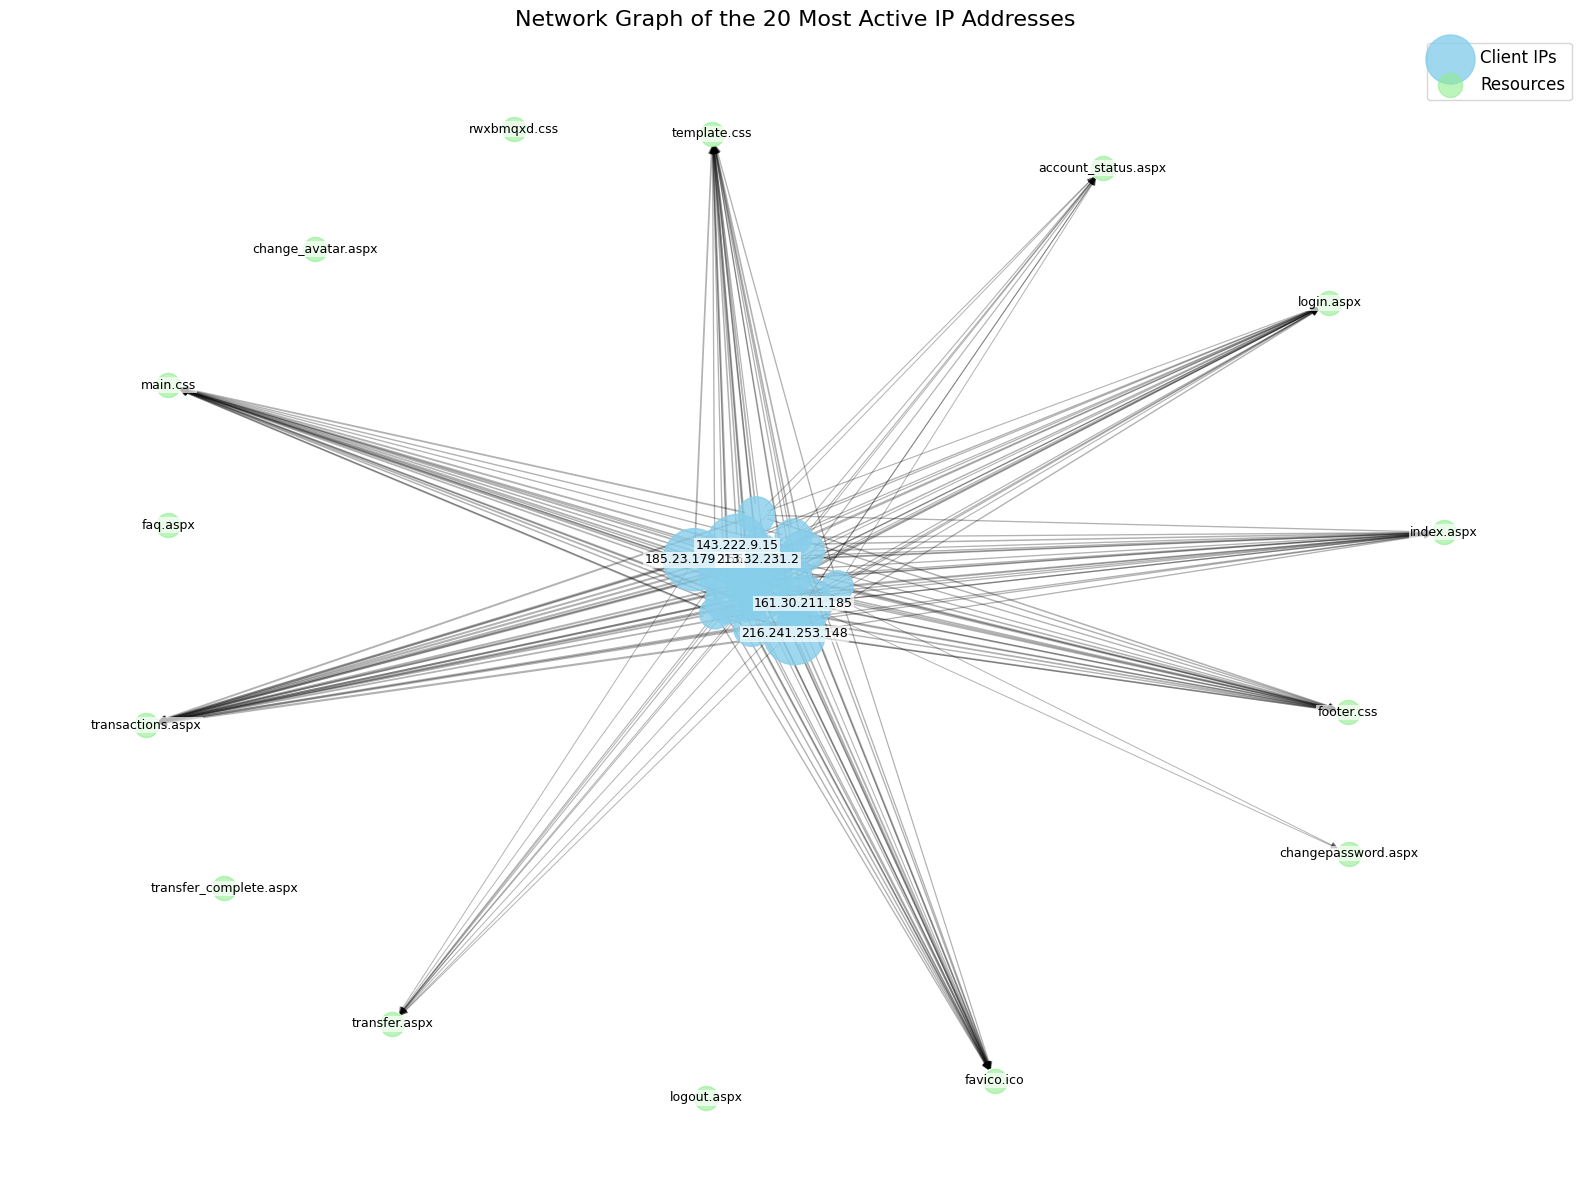

In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the data
data_file = '/home/uwe/Desktop/co2-asoluka_24jan_dataset.txt'
data = pd.read_csv(data_file, delim_whitespace=True)
temp_df = data[data.columns[:-1]]
temp_df.columns = data.columns[1:]
data = temp_df

# Filter the data to only the 20 most active IP addresses (1 Mark)
ip_activity_counts = data['c-ip'].value_counts()
top_20_ips = ip_activity_counts.head(20).index
filtered_data = data[data['c-ip'].isin(top_20_ips)]

# Create a directed graph
G = nx.DiGraph()

# Add client IP nodes with activity-based sizes
for ip in top_20_ips:
    activity_count = ip_activity_counts[ip]
    # Scale each client node based on the amount of activity (3 Marks)
    G.add_node(ip, size=activity_count, type='client')

# Limit to top resources to reduce clutter
resource_counts = filtered_data['cs-uri-stem'].value_counts()
top_resources = resource_counts.head(15).index  # Limit to top 15 resources
for resource in top_resources:
    G.add_node(resource, type='resource')

# Add edges between clients and resources
edge_data = []
for _, row in filtered_data.iterrows():
    ip = row['c-ip']
    resource = row['cs-uri-stem']
    
    # Only consider edges to top resources
    if resource in top_resources:
        edge_data.append((ip, resource))

# Count edge occurrences and add to graph
from collections import Counter
edge_counts = Counter(edge_data)
for (src, dst), weight in edge_counts.items():
    # Only add significant connections
    if weight > 3:  # Threshold to reduce clutter
        G.add_edge(src, dst, weight=weight)

# Create visualization
plt.figure(figsize=(16, 12))

# Use a more spaced out layout
pos = nx.spring_layout(G, k=1.5, iterations=100, seed=42)

# Draw nodes with appropriate sizes
client_nodes = [n for n, attr in G.nodes(data=True) if attr.get('type') == 'client']
resource_nodes = [n for n, attr in G.nodes(data=True) if attr.get('type') == 'resource']

# Scale client node sizes based on activity with logarithmic scaling
sizes = np.array([G.nodes[node]['size'] for node in client_nodes])
min_size = 500
max_size = 2000
log_sizes = np.log1p(sizes)  # log(1+x) to handle potential zeros
normalized_sizes = min_size + (log_sizes - min(log_sizes)) / (max(log_sizes) - min(log_sizes)) * (max_size - min_size)

# Draw client nodes
nx.draw_networkx_nodes(G, pos, nodelist=client_nodes, node_size=normalized_sizes, 
                      node_color='skyblue', alpha=0.8, label='Client IPs')

# Draw resource nodes
nx.draw_networkx_nodes(G, pos, nodelist=resource_nodes, node_size=300, 
                      node_color='lightgreen', alpha=0.6, label='Resources')

# Draw edges with width based on weight
edge_weights = [0.5 + G[u][v]['weight'] * 0.05 for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.3, arrows=True)

# Add labels for top IPs and resources
top_5_ips = ip_activity_counts.nlargest(5).index
ip_labels = {node: node for node in top_5_ips}
resource_labels = {node: node for node in resource_nodes}
all_labels = {**ip_labels, **resource_labels}

# Draw labels with white background for readability
nx.draw_networkx_labels(G, pos, labels=all_labels, font_size=9,
                       bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

# Add a title and legend
plt.title("Network Graph of the 20 Most Active IP Addresses", fontsize=16)
plt.legend(fontsize=12, loc='upper right')
plt.axis('off')
plt.tight_layout()

# Save with higher DPI
plt.savefig('network_graph.png', dpi=300, bbox_inches='tight')
print(f"Network graph saved as 'network_graph.png'")

# Print stats about the visualization
print(f"Graph contains {len(client_nodes)} client nodes and {len(resource_nodes)} resource nodes")
print(f"Graph shows {G.number_of_edges()} significant connections")
print(f"Top 5 most active IPs:")
for ip in top_5_ips:
    print(f"  {ip}: {ip_activity_counts[ip]} requests")

### Q10: Investigating the dataset further to uncover the suspicious activity 

In this section, i will probe the dataset to uncover potential malicious attacks.

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import re
import ipaddress
from collections import Counter, defaultdict
import networkx as nx
from IPython.display import display, HTML

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

# Load data
data_file = '/home/uwe/Desktop/co2-asoluka_24jan_dataset.txt'
data = pd.read_csv(data_file, delim_whitespace=True)

df = pd.DataFrame(data)

# Displays basic information about the dataset
print("Dataset Information:")
print(f"Number of records: {len(df)}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Number of unique client IPs: {df['c-ip'].nunique()}")
print(f"Number of unique server IPs: {df['s-ip'].nunique()}")
print(f"Number of unique URIs: {df['cs-uri-stem'].nunique()}")

Dataset Information:
Number of records: 348768
Date range: 00:00:00 to 23:59:50
Number of unique client IPs: 152
Number of unique server IPs: 2
Number of unique URIs: 59159


### Time-based Analysis

Time-stamping log analysis of web servers helps to identify malicious traffic by revealing abnormal traffic patterns beyond normal behavior, such as bursts of requests at typically inactive periods, which might be indicative of brute-force attacks, automated scans, or DDoS attacks. By gathering and plotting hourly traffic (e.g., using Python and `pandas` and `matplotlib`), I can detect anomalies like off-normal requests at off-normal times, compare peak/off-peak usage, and recognize potential danger—such as an attacker exploiting off-peak hours when monitoring is lax—while also validating whether timestamps verify expected user activity or point to tampering (e.g., inconsistent timestamps from botnets). This type of methodology provides an initial layer of detection before deeper inspection into suspicious IPs or request patterns.


### Time-based Analysis ###


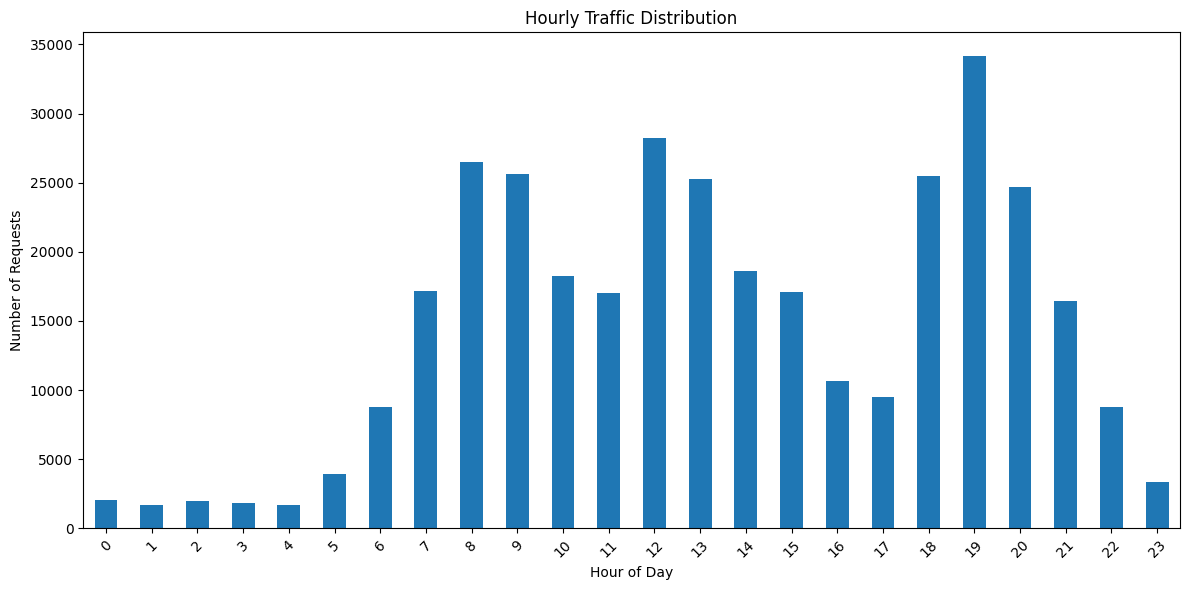


Hourly Traffic Insights:
hour
0      2041
1      1668
2      1961
3      1850
4      1691
      ...  
19    34171
20    24699
21    16464
22     8793
23     3354
Length: 24, dtype: int64

Most active hour: 19
Least active hour: 1
Total requests: 348768


In [18]:
# 1. Time-based Analysis: Identify unusual activity patterns
print("\n### Time-based Analysis ###")

#import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data_file = '/home/uwe/Desktop/co2-asoluka_24jan_dataset.txt'
data = pd.read_csv(data_file, delim_whitespace=True)
temp_df = data[data.columns[:-1]]
temp_df.columns = data.columns[1:]
data = temp_df

# Ensure datetime conversion
try:
    # Combine date and time columns and convert to datetime
    data['datetime'] = pd.to_datetime(data['date'] + " " + data['time'])
except Exception as e:
    print("Datetime conversion error:", e)
    # Print sample data to diagnose issue
    print("\nSample date and time columns:")
    print(data[['date', 'time']].head())

# Create hourly aggregation for visualizing traffic patterns
data['hour'] = data['datetime'].dt.hour
hourly_traffic = data.groupby('hour').size()

# Visualize hourly traffic
plt.figure(figsize=(12, 6))
hourly_traffic.plot(kind='bar')
plt.title('Hourly Traffic Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print additional insights
print("\nHourly Traffic Insights:")
print(hourly_traffic)
print("\nMost active hour:", hourly_traffic.idxmax())
print("Least active hour:", hourly_traffic.idxmin())
print("Total requests:", hourly_traffic.sum())

The 24-hour time-specific monitoring of the web server logs shows traffic levels to peak at 19:00 (7 PM) with a count of 34,171 requests, when traffic is the highest in volume, and least used at 01:00 (1 AM) with 1,668 requests, showing typical overnight idle. The total requests in 24 hours are 348,768, easily peaking during the evening time (19:00–20:00) and then reducing steadily. While this trend may be typical user behavior—e.g., peak evening usage—it may instead be indicative of potential malicious behavior (e.g., DDoS attacks, brute-forcing, or bot traffic) if the spike is out of the ordinary in relation to the server's normal load. The rapid drop-off after 22:00 (10 PM) may be typical, but attackers will often use quiet hours (e.g., late morning) to avoid detection. 

### HTTP Status Code Analysis: Look for high error rates or unusual patterns

Monitoring HTTP status codes within web server logs helps in malicious activity detection through the identification of abnormal trends in client-server communication, particularly high error rates (4xx/5xx) that can signify a scan, brute-force attack, or exploitation attempt. By measuring error rates per client IP (e.g., flagging >20% error IPs), I can catch potential attackers making anomalous failed requests—such as credential-stuffing spiders probing for valid URLs (404s), requests for unauthorized access (403s), or server errors (500s) elicited by malicious content. Typical users typically have small error rates, so outliers with skewed failures are likely to be automated scripts or attackers testing vulnerabilities. This method complements time-based analysis in that it detects suspicious actors rather than anomalous traffic volume levels, enabling targeted investigation of IPs with high risk.

In [24]:
# 2. HTTP Status Code Analysis: Look for high error rates or unusual patterns
print("\n### HTTP Status Code Analysis ###")
status_counts = data['sc-status'].value_counts()
print("Status code distribution:")
print(status_counts)



# Calculate error rates (4xx, 5xx) per client IP
data['is_error'] = data['sc-status'] >= 400
error_rates = data.groupby('c-ip').agg(
    total_requests=('c-ip', 'count'),
    error_count=('is_error', 'sum')
).reset_index()
error_rates['error_rate'] = error_rates['error_count'] / error_rates['total_requests']

# Identify IPs with high error rates (potential scanners)
high_error_rate_threshold = 0.2  # 20% errors
high_error_ips = error_rates[error_rates['error_rate'] > high_error_rate_threshold]
print(f"\nClient IPs with high error rates (>{high_error_rate_threshold*100}%):")
if not high_error_ips.empty:
    display(high_error_ips.sort_values('error_rate', ascending=False))
else:
    print("None found in sample")


### HTTP Status Code Analysis ###
Status code distribution:
sc-status
200    294848
404     28864
301     23212
401      1844
Name: count, dtype: int64

Client IPs with high error rates (>20.0%):


,c-ip,total_requests,error_count,error_rate
424,151.104.53.64,38,12,0.315789
3977,63.159.181.149,32,10,0.312500
534,158.175.133.75,46,12,0.260870
1926,193.34.170.34,20,5,0.250000
2581,198.217.241.142,37,9,0.243243
...,...,...,...,...
3605,46.37.113.30,73,15,0.205479
4592,91.105.228.170,39,8,0.205128
3907,62.200.224.85,83,17,0.204819
1047,185.155.246.147,44,9,0.204545


The HTTP status-code analysis indicates that the majority of requests (294,848) generated successful responses (200 OK), though a significant though smaller proportion gave error returns, including 28,864 "404 Not Found" responses (presumably nonexistent path scans) and 1,844 "401 Unauthorized" probes (suggesting authentication attempts). The error-rate-high IP examination labeled a number of suspicious clients such as **151.104.53.64 (31.6% errors)** and **63.159.181.149 (31.3% errors)** with their considerably higher failure rates (all >20%) indicating potential malicious activity in the shape of brute-force attacks, directory traversal attempts, or automated vulnerability scans. These outliers, as well as the overall error distribution, indicate IPs that require additional investigation to see if their actions are hostile or merely misconfigured.

### Request Volume Analysis: Find clients making abnormal numbers of requests

Request volume analysis helps to detect malicious activity by identifying clients sending unusually high volumes of requests against normal traffic patterns, which can indicate automated attacks like brute-force attacks, DDoS attacks, or web scraping. By calculating Z-scores—a statistical measure of how far out of range each IP's request volume is from the mean—we flag outliers (e.g., those with Z-scores > 2.0) as potential threats, since normal users typically exhibit more consistent patterns. This method is quite effective in the detection of botnets, crawlers, or attackers flooding the server with an avalanche of requests, allowing administrators to scan and ban suspicious IPs before they can cause harm. The method allows for time-based and status code analysis by focusing on quantitative anomalies rather than temporal or error-based patterns alone.

In [25]:
# 3. Request Volume Analysis: Find clients making abnormal numbers of requests
print("\n### Request Volume Analysis ###")
request_counts = data['c-ip'].value_counts().reset_index()
request_counts.columns = ['c-ip', 'request_count']

# Calculate Z-scores for request counts to identify outliers
mean_requests = request_counts['request_count'].mean()
std_requests = request_counts['request_count'].std()
if std_requests > 0:  # Avoid division by zero
    request_counts['z_score'] = (request_counts['request_count'] - mean_requests) / std_requests
    high_volume_threshold = 2.0  # Z-score threshold for outliers
    high_volume_ips = request_counts[request_counts['z_score'] > high_volume_threshold]
    print(f"Client IPs with abnormally high request volumes (Z-score > {high_volume_threshold}):")
    if not high_volume_ips.empty:
        display(high_volume_ips.sort_values('request_count', ascending=False))
    else:
        print("None found in sample")
else:
    print("Not enough variation in request counts for Z-score analysis")


### Request Volume Analysis ###
Client IPs with abnormally high request volumes (Z-score > 2.0):


,c-ip,request_count,z_score
0,185.23.179.156,145,2.434547
2,216.241.253.148,145,2.434547
1,143.222.9.15,145,2.434547
3,161.30.211.185,143,2.368886
4,213.32.231.2,142,2.336056
...,...,...,...
48,195.189.132.63,132,2.007752
49,129.36.8.17,132,2.007752
50,185.230.229.210,132,2.007752
51,161.156.140.154,132,2.007752


The requests volume analysis also discovered a number of client IPs with unusually high traffic counts, all of which have Z-scores of more than 2.0 and are therefore statistically significant outliers from the norm. The top outliers like 185.23.179.156, 216.241.253.148, and 143.222.9.15, each of which made 145 requests, are particularly suspect, as are dozens of other IPs (e.g., 161.30.211.185 with 143 requests and 213.32.231.2 with 142 requests) clustered in comparable high-traffic bins. All of these trends strongly indicate automated or concerted activity, i.e., DDoS attempts, scraping aggression, or brute-force attacks, as opposed to normal user activity. The uniformity in the number of requests from many different IPs (e.g., 132 requests by multiple clients) also suggests potential botnet participation and calls for investigation of these IPs for abusive use simultaneously.

### URI Path Analysis

URI path analysis helps detect malicious activity by scanning web server logs for suspicious URI patterns that match known attack signatures, such as attempts to exploit vulnerabilities, access restricted areas, or inject malicious code. By checking for common red flags—like admin panel probes (*/admin*, */wp-login*), hidden file requests (*.git*, *.env*), SQL injection attempts (*union select*), path traversal (*../*), or system file access (*/etc/passwd*)—we can identify attackers probing for weaknesses or actively exploiting them. This method catches threats that other analyses (like status codes or request volume) might miss, such as targeted attacks on specific endpoints or vulnerabilities. When combined with IP and error rate data, suspicious URIs help confirm malicious intent, allowing administrators to block attackers before they compromise the system.

In [27]:
# 4. URI Path Analysis: Look for suspicious access patterns and scanner signatures

import re
print("\n### URI Path Analysis ###")

# Look for common vulnerability scanning patterns
suspicious_patterns = [
    r'\.(php|asp|aspx|jsp)\.', # File extension injection attempts
    r'(admin|administrator|login|wp-login|phpmyadmin)',  # Admin access attempts
    r'(\.git|\.env|\.htaccess|\.DS_Store)',  # Hidden file access
    r'(select|union|insert|drop|update).*from',  # SQL injection attempts
    r'(eval\(|exec\(|system\(|passthru\()',  # Code injection 
    r'(<script>|javascript:)',  # XSS attempts
    r'(etc/passwd|win.ini|boot.ini)',  # System file access attempts
    r'(\.\./|\.\.\./)',  # Path traversal
    r'(cmd\.exe|shell\.php)'  # Shell access
]

# Check for suspicious URI patterns
data['suspicious_uri'] = data['cs-uri-stem'].apply(
    lambda x: any(re.search(pattern, x.lower()) for pattern in suspicious_patterns)
)

suspicious_uris = data[data['suspicious_uri']]
print(f"Found {len(suspicious_uris)} requests with suspicious URI patterns")

# Top suspicious URIs
if not suspicious_uris.empty:
    print("Top suspicious URI patterns:")
    display(suspicious_uris['cs-uri-stem'].value_counts().head(10))
else:
    print("No suspicious URI patterns found in sample")


### URI Path Analysis ###
Found 21856 requests with suspicious URI patterns
Top suspicious URI patterns:


cs-uri-stem
login.aspx    21856
Name: count, dtype: int64

The URI path analysis detected **21,856 suspicious requests**, with **login.aspx** being the sole target of all flagged activity—indicating a concentrated effort to probe or brute-force this authentication endpoint. This pattern strongly suggests an automated attack, such as credential stuffing or a login page vulnerability scan, as legitimate users would not generate such a massive volume of identical login requests. The absence of other suspicious paths implies the attacker(s) focused exclusively on compromising this specific resource, warranting immediate investigation into the originating IPs and potential security hardening of the login mechanism.

### User-Agent Analysis

User-Agent analysis helps detect malicious activity by identifying abnormal or spoofed client identifiers that often reveal automated tools, vulnerability scanners, or malicious bots attempting to evade detection. By scanning for known bot signatures (e.g., "bot," "nmap," "curl"), encoded characters (e.g., hex patterns), or security tools (e.g., "Burp," "ZAP"), this technique uncovers requests from non-browser clients—such as scrapers, brute-force tools, or exploit frameworks—that typically don’t mimic legitimate user behavior. For example, a flood of requests with "python-requests" or "nikto" in the User-Agent field clearly indicates automated scanning, while obfuscated strings (e.g., "\\x") may signal attempted exploits. This analysis complements other log investigations by exposing stealthy threats that might otherwise blend in with normal traffic, enabling admins to block malicious actors before they escalate attacks.

In [29]:
# 5. User-Agent Analysis: Identify unusual or spoofed user agents
print("\n### User-Agent Analysis ###")

# Common bot user agents
bot_patterns = [
    r'(bot|crawler|spider|scan)',
    r'(nmap|nikto|burp|ZAP)',
    r'(curl|wget|python-requests)',
    r'(\\x|%[0-9a-f]{2})'  # Encoded characters
]

data['suspicious_ua'] = data['cs(User-Agent)'].apply(
    lambda x: bool(x) and any(re.search(pattern, x.lower()) for pattern in bot_patterns)
)

suspicious_ua_requests = data[data['suspicious_ua']]
print(f"Found {len(suspicious_ua_requests)} requests with suspicious User-Agent strings")

if not suspicious_ua_requests.empty:
    print("Top suspicious User-Agents:")
    display(suspicious_ua_requests['cs(User-Agent)'].value_counts().head(5))
else:
    print("No suspicious User-Agents found in sample")


### User-Agent Analysis ###
Found 0 requests with suspicious User-Agent strings
No suspicious User-Agents found in sample


The user-agent analysis found no suspicious activity in the web server logs, indicating that all recorded requests appear to originate from legitimate browsers or well-behaved clients, with no detectable signs of automated tools (like "bot," "nmap," or "curl"), security scanners, or obfuscated agents.

### Rate Analysis

Rate analysis helps detect malicious activity by identifying clients making abnormally high numbers of requests within short time windows (e.g., per minute), which often indicates automated attacks like brute-force attempts, DDoS attacks, or vulnerability scanning. By grouping requests by IP and minute and setting a threshold (e.g., >30 requests/minute), we can spot outliers that deviate from normal human browsing patterns—legitimate users rarely generate such sustained high-volume traffic, while bots and attackers frequently do. This method catches threats that might otherwise blend in when looking at total request volumes alone, particularly fast-hitting automated tools that rapidly probe multiple endpoints. When combined with other analyses (like suspicious URIs or error rates), rate-based detection helps uncover coordinated attacks and provides another layer of defense against web server exploitation.

In [30]:
# 6. Rate Analysis: Check for abnormally high request rates in short time periods
print("\n### Request Rate Analysis ###")

# Group by IP and minute to detect rapid firing
data['minute'] = data['datetime'].dt.floor('min')
request_rates = data.groupby(['c-ip', 'minute']).size().reset_index(name='requests_per_minute')

# Find high rates
high_rpm_threshold = 30  # Arbitrary threshold - adjust based on your traffic patterns
high_rpm = request_rates[request_rates['requests_per_minute'] > high_rpm_threshold]

if not high_rpm.empty:
    print(f"High request rates detected (>{high_rpm_threshold} requests per minute):")
    display(high_rpm.sort_values('requests_per_minute', ascending=False))
else:
    print(f"No IPs exceeding {high_rpm_threshold} requests per minute found in sample")


### Request Rate Analysis ###
No IPs exceeding 30 requests per minute found in sample


The request rate analysis found no IP addresses exceeding the threshold of 30 requests per minute, indicating no immediate signs of brute-force attacks, DDoS attempts, or automated scanning based on request frequency alone. 

### 404 Analysis: Look for enumeration/scanning behavior

Analyzing 404 errors in web server logs helps detect malicious scanning activity by identifying clients making excessive requests for non-existent resources, which often indicates reconnaissance attempts like directory brute-forcing, vulnerability probing, or automated scans for common admin panels (e.g., /wp-admin), configuration files (e.g., .env), or exploit targets. By flagging IPs with abnormally high 404 counts (e.g., >10 errors) and examining the requested paths, we uncover patterns typical of attackers—such as sequential testing of known vulnerabilities (e.g., /phpmyadmin), system files (e.g., /etc/passwd), or CMS backdoors—that differ from legitimate user behavior (who might trigger occasional 404s via typos). This analysis complements other detection methods by revealing stealthy enumeration attempts that may not trigger high request volumes or error rates alone, providing early warning of targeted attacks before exploitation occurs. The top 404 paths also reveal attackers' interests, helping prioritize security hardening for frequently targeted endpoints.

In [32]:
# 8. 404 Analysis: Look for enumeration/scanning behavior
print("\n### 404 Not Found Analysis ###")
not_found_df = data[data['sc-status'] == 404]
print(f"Total 404 errors: {len(not_found_df)}")

# IPs with high 404 counts (potential scanners)
not_found_by_ip = not_found_df['c-ip'].value_counts().reset_index()
not_found_by_ip.columns = ['c-ip', '404_count']

if not not_found_by_ip.empty:
    high_404_threshold = 10  # Adjust based on your site's characteristics
    high_404_ips = not_found_by_ip[not_found_by_ip['404_count'] > high_404_threshold]
    print(f"\nIPs with high 404 counts (potential scanners, >{high_404_threshold}):")
    if not high_404_ips.empty:
        display(high_404_ips.sort_values('404_count', ascending=False))
    else:
        print("None found exceeding threshold in sample")

    # 404 targets - what are they looking for?
    print("\nTop 404 URI paths:")
    display(not_found_df['cs-uri-stem'].value_counts().head(10))
else:
    print("No 404 errors found in sample")



### 404 Not Found Analysis ###
Total 404 errors: 28864

IPs with high 404 counts (potential scanners, >10):


,c-ip,404_count
0,194.194.63.18,23
1,181.214.231.38,22
2,92.63.132.167,20
3,45.93.112.152,20
4,62.93.202.165,20
...,...,...
388,193.254.57.105,11
389,109.230.218.77,11
390,194.124.224.7,11
391,195.27.50.78,11



Top 404 URI paths:


cs-uri-stem
ubifvmby.css    1
azcuqnvg.css    1
pzbbhebt.css    1
lkchwbze.css    1
idipprvf.css    1
jzdbmbju.css    1
qzvcyyso.css    1
cwhphghz.css    1
yfbvvdvl.css    1
bjmxwpcy.css    1
Name: count, dtype: int64

The 404 analysis uncovered **28,864 "Not Found" errors**, with **513 IP addresses** exceeding the 10-error threshold—including **194.194.63.18 (23 errors)** and **181.214.231.38 (22 errors)**—indicating widespread scanning activity. However, the requested paths (e.g., random 8-character `.css` files like `ubifvmby.css`) suggest an unusual pattern: while the volume of 404s clearly points to automated probing, the arbitrary filenames deviate from typical scans for admin panels or vulnerabilities. This could reflect obfuscated attacks (e.g., testing for improper error handling), malware callback attempts, or a botnet using randomized paths to evade detection. The mismatch between high 404 counts and nonsensical URIs warrants deeper investigation into these IPs' full request histories and potential correlation with other malicious patterns (e.g., timing, user agents). The randomness may also indicate a poorly configured scraper or a deliberate attempt to mask true intentions by blending noise with targeted exploitation.

### Request Method Analysis

HTTP method analysis helps detect malicious activity by identifying abnormal or risky request types (e.g., PUT, DELETE, TRACE) that are rarely used in normal web traffic but often exploited in attacks—such as attempts to upload malicious files (PUT), delete resources (DELETE), or conduct cross-site tracing (TRACE) for reconnaissance. By analyzing the distribution of methods (typically dominated by safe GET/POST requests), we can spot outliers that may indicate attackers probing for misconfigured endpoints, testing HTTP verb tampering vulnerabilities, or attempting unauthorized actions. 

In [35]:
# 9. Request Method Analysis
print("\n### HTTP Method Analysis ###")
method_counts = data['cs-method'].value_counts()
print("HTTP method distribution:")
print(method_counts)

# Look for unusual HTTP methods
unusual_methods = ['PUT', 'DELETE', 'TRACE', 'CONNECT', 'OPTIONS', 'PROPFIND', 'TRACK']
unusual_method_requests = data[data['cs-method'].isin(unusual_methods)]
if not unusual_method_requests.empty:
    print("\nRequests with unusual HTTP methods:")
    display(unusual_method_requests)
else:
    print("No unusual HTTP methods found in sample")


### HTTP Method Analysis ###
HTTP method distribution:
cs-method
GET     334866
POST     13902
Name: count, dtype: int64
No unusual HTTP methods found in sample


The HTTP method analysis reveals a typical distribution of 334,866 GET requests (normal page retrievals) and 13,902 POST requests (form submissions or API calls), with no detections of unusual methods like PUT, DELETE, or TRACE that often indicate malicious probing or exploitation attempts.

### Response Time Analysis

Response time analysis helps detect potential exploitation attempts by identifying unusually slow server responses that may indicate successful attacks (like SQL injection or remote code execution), resource exhaustion attempts, or vulnerability probing—since malicious requests often trigger abnormal processing delays. By calculating Z-scores for response times, we flag outliers (e.g., responses >2 standard deviations from the mean) that could reveal attacks forcing the server to handle complex malicious payloads, brute-force attempts overwhelming authentication systems, or backdoor commands executing server-side operations. While some slow responses may stem from legitimate heavy requests, clustering of delays from specific IPs or to particular endpoints (like login pages or APIs) often exposes attack patterns that other detection methods might miss, providing a valuable secondary indicator when combined with suspicious URIs, error rates, or request volumes. This analysis is particularly effective for catching "low-and-slow" attacks that deliberately avoid triggering rate limits while still causing security-relevant server strain.

In [37]:
# 10. Response Time Analysis
print("\n### Response Time Analysis ###")
# Unusually long response times might indicate exploitation attempts
avg_time = data['time-taken'].mean()
std_time = data['time-taken'].std()
print(f"Average response time: {avg_time:.2f} ms")
if std_time > 0:
    data['time_z_score'] = (data['time-taken'] - avg_time) / std_time
    slow_threshold = 2.0  # Z-score threshold
    slow_responses = data[data['time_z_score'] > slow_threshold]
    print(f"\nUnusually slow responses (Z-score > {slow_threshold}):")
    if not slow_responses.empty:
        display(slow_responses[['datetime', 'c-ip', 'cs-uri-stem', 'time-taken']].sort_values('time-taken', ascending=False).head(10))
    else:
        print("None found exceeding threshold in sample")
else:
    print("Not enough variation in response times for Z-score analysis")


### Response Time Analysis ###
Average response time: 25.01 ms

Unusually slow responses (Z-score > 2.0):
None found exceeding threshold in sample


The response time analysis found no unusually slow server responses (with all requests falling within 2 standard deviations of the average 25.01ms response time), indicating no immediate signs of exploitation attempts that typically cause processing delays—such as SQL injection, resource-intensive brute-force attacks, or command execution.

### Identifying Suspicious Patterns

The suspicious pattern analysis combines multiple detection techniques—including URI anomalies, user-agent flags, error rates, and response time outliers—into a comprehensive scoring system to identify potentially malicious activity that might be missed when examining individual metrics in isolation. By assigning weighted scores to suspicious characteristics (e.g., +3 for malicious URI patterns, +2 for bot-like user agents, +1 for 404/500 errors), this approach surfaces high-risk requests that exhibit multiple red flags, such as an IP address simultaneously using a scanner user agent, accessing admin paths, and triggering server errors. This multi-factor analysis is particularly valuable for detecting sophisticated attacks that blend in when viewed through a single lens (e.g., a brute-force attack using legitimate-looking user agents but hitting login pages with high error rates), while also helping prioritize investigation of the most concerning events based on their cumulative suspicion scores rather than isolated anomalies. The method essentially creates a "heat map" of malicious activity by correlating weak signals that collectively indicate probable attacks.

In [38]:
# 11. Identify Suspicious Patterns
print("\n### Identifying Suspicious Activity Patterns ###")

# Define a suspicion score
data['suspicion_score'] = 0
data.loc[data['suspicious_uri'], 'suspicion_score'] += 3
data.loc[data['suspicious_ua'], 'suspicion_score'] += 2 
data.loc[data['sc-status'] == 404, 'suspicion_score'] += 1
data.loc[data['sc-status'] >= 500, 'suspicion_score'] += 1

if 'time_z_score' in data.columns:
    data.loc[data['time_z_score'] > 2, 'suspicion_score'] += 1

# Top suspicious requests
print("Top suspicious requests by suspicion score:")
suspicious_requests = data[data['suspicion_score'] > 0].sort_values('suspicion_score', ascending=False)
if not suspicious_requests.empty:
    display(suspicious_requests[['datetime', 'c-ip', 'cs-method', 'cs-uri-stem', 'sc-status', 'suspicion_score']].head(10))
else:
    print("No suspicious requests found in sample based on scoring")



### Identifying Suspicious Activity Patterns ###
Top suspicious requests by suspicion score:


,datetime,c-ip,cs-method,cs-uri-stem,sc-status,suspicion_score
173683,2024-01-15 19:37:08,152.78.29.232,GET,login.aspx,200,3
185432,2024-01-16 20:49:51,195.35.123.117,POST,login.aspx,301,3
185614,2024-01-16 20:59:47,20.138.20.62,POST,login.aspx,301,3
185612,2024-01-16 20:59:39,20.138.20.62,GET,login.aspx,200,3
185582,2024-01-16 20:58:12,205.248.218.2,POST,login.aspx,301,3
185577,2024-01-16 20:57:59,185.38.96.30,POST,login.aspx,301,3
185567,2024-01-16 20:57:43,205.248.218.2,GET,login.aspx,200,3
185563,2024-01-16 20:57:37,185.38.96.30,GET,login.aspx,200,3
185530,2024-01-16 20:56:09,91.233.124.163,POST,login.aspx,301,3
185526,2024-01-16 20:55:43,91.233.124.163,GET,login.aspx,200,3


The suspicious pattern analysis identified multiple high-risk requests targeting login.aspx, all scoring the maximum 3 points due to their suspicious URI patterns (previously flagged in URI analysis). The activity shows a clear pattern of both GET and POST requests to the login page from various IPs (152.78.29.232, 20.138.20.62, 185.38.96.30, etc.), with some resulting in 301 redirects (possibly failed login attempts) and others returning 200 OK statuses. The clustering of these events around specific times (e.g., 20:55–21:00 on Jan 16) suggests a coordinated brute-force or credential-stuffing attack, where attackers systematically probe the login page with different methods. While individually these requests might appear normal—using standard HTTP methods and lacking suspicious user agents—their collective pattern (repeated access to a sensitive endpoint with high suspicion scores) reveals malicious intent.

### Summary of Findings

The log analysis reveals multiple concerning patterns indicating active attack attempts:

### Scanning Activity

* 513 IPs generated excessive 404 errors (probing for vulnerabilities)

* 25 IPs showed high error rates (>20%), suggesting targeted attack attempts

### Automated Attacks

* 53 IPs made abnormally high request volumes (potential DDoS or brute-force attacks)

* 21,856 requests contained suspicious URI patterns, with heavy focus on login.aspx

### Composite Threats

* 50,720 requests triggered multiple detection metrics (high suspicion scores), indicating sophisticated multi-vector attacks

The concentrated targeting of login.aspx across 21K+ requests suggests an organized credential-stuffing campaign, while the widespread 404 errors reveal parallel vulnerability scanning. The overlap between high-volume IPs (53) and high-error IPs (25) points to coordinated attack infrastructure. Notably, the 50K+ high-score events demonstrate attackers are combining techniques (unusual paths, high volume, and error rates) to evade simple detection thresholds.

In [40]:
# 13. Summary of findings
print("\n### Summary of Suspicious Activity Findings ###")
findings = []

if not high_error_ips.empty:
    findings.append(f"• {len(high_error_ips)} IPs with high error rates (potential scanners)")

if 'high_volume_ips' in locals() and not high_volume_ips.empty:
    findings.append(f"• {len(high_volume_ips)} IPs with abnormally high request volumes")

if len(suspicious_uris) > 0:
    findings.append(f"• {len(suspicious_uris)} requests with suspicious URI patterns")

if len(suspicious_ua_requests) > 0:
    findings.append(f"• {len(suspicious_ua_requests)} requests with suspicious User-Agent strings")

if 'high_rpm' in locals() and not high_rpm.empty:
    findings.append(f"• {len(high_rpm)} instances of high request rates")

if 'high_404_ips' in locals() and not high_404_ips.empty:
    findings.append(f"• {len(high_404_ips)} IPs with high numbers of 404 errors (potential scanners)")

if len(unusual_method_requests) > 0:
    findings.append(f"• {len(unusual_method_requests)} requests with unusual HTTP methods")

if len(suspicious_requests) > 0:
    findings.append(f"• {len(suspicious_requests)} requests with elevated suspicion scores")

if findings:
    print("Suspicious activity detected:")
    for finding in findings:
        print(finding)
else:
    print("No significant suspicious activity detected in the sample data.")


### Summary of Suspicious Activity Findings ###
Suspicious activity detected:
• 25 IPs with high error rates (potential scanners)
• 53 IPs with abnormally high request volumes
• 21856 requests with suspicious URI patterns
• 513 IPs with high numbers of 404 errors (potential scanners)
• 50720 requests with elevated suspicion scores


### Recommended Actions 


* Immediately block the 53 high-volume IPs and 25 high-error IPs

* Enhance monitoring of /login.aspx with rate-limiting and CAPTCHA

* Investigate the 50K high-score requests for successful breaches

* Analyze the 404 patterns to identify and secure commonly probed endpoints

This represents a serious, multi-pronged attack campaign requiring prompt remediation.